## Desafio parte 1

### Descrição:

    - Análise exploratória para entendimento das principais características dos dados.

### Perguntas:
    
    - Quais são os estabelecimentos com maior número de reviews?
    - Quais são as categorias de estabelecimento?
    - A maior parte dos esabelecimentos são restaurantes?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [21]:
df = pd.read_csv('data/X_testToronto.csv')
df_reviews = pd.read_csv('data/reviewsTrainToronto.csv')

In [4]:
df.head()

,business_id,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ..."
1,h6NYKqweTmcBz3z6UeUJ8w,Rosedale Radiology and Ultrasound,600 Sherbourne Street,M4X 1W4,43.671682,-79.376870,6,1,NaN,"Diagnostic Imaging, Diagnostic Services, Docto...",NaN,"{'type': 'Point', 'coordinates': [-79.3768696,..."
2,AycqWXrDVlbRfJE-kA5MMw,Savour Toronto,NaN,NaN,43.653226,-79.383184,8,1,{'RestaurantsPriceRange2': '3'},"Party & Event Planning, Hotels & Travel, Local...",NaN,"{'type': 'Point', 'coordinates': [-79.3831843,..."
3,EVC1vn1KQ2uETnTbDWXc5w,Cadillac Jenkins,930 Queen Street W,M6J 1G6,43.645042,-79.416121,13,0,"{'RestaurantsReservations': 'False', 'GoodForK...","Caribbean, Tapas/Small Plates, Restaurants","{'Tuesday': '17:0-2:0', 'Wednesday': '17:0-2:0...","{'type': 'Point', 'coordinates': [-79.4161208,..."
4,fdTDe7XIXfhftmgNfR_-3g,Laura Secord,"Toronto Eaton Centre, 220 Yonge Street",M5B 2H1,43.654067,-79.380082,3,0,"{'BusinessParking': ""{'garage': False, 'street...","Specialty Food, Chocolatiers & Shops, Food",NaN,"{'type': 'Point', 'coordinates': [-79.3800815,..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   1324 non-null   object 
 1   name          1324 non-null   object 
 2   address       1309 non-null   object 
 3   postal_code   1317 non-null   object 
 4   latitude      1324 non-null   float64
 5   longitude     1324 non-null   float64
 6   review_count  1324 non-null   int64  
 7   is_open       1324 non-null   int64  
 8   attributes    1126 non-null   object 
 9   categories    1321 non-null   object 
 10  hours         978 non-null    object 
 11  loc           1324 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 124.2+ KB


<Axes: xlabel='review_count', ylabel='name'>

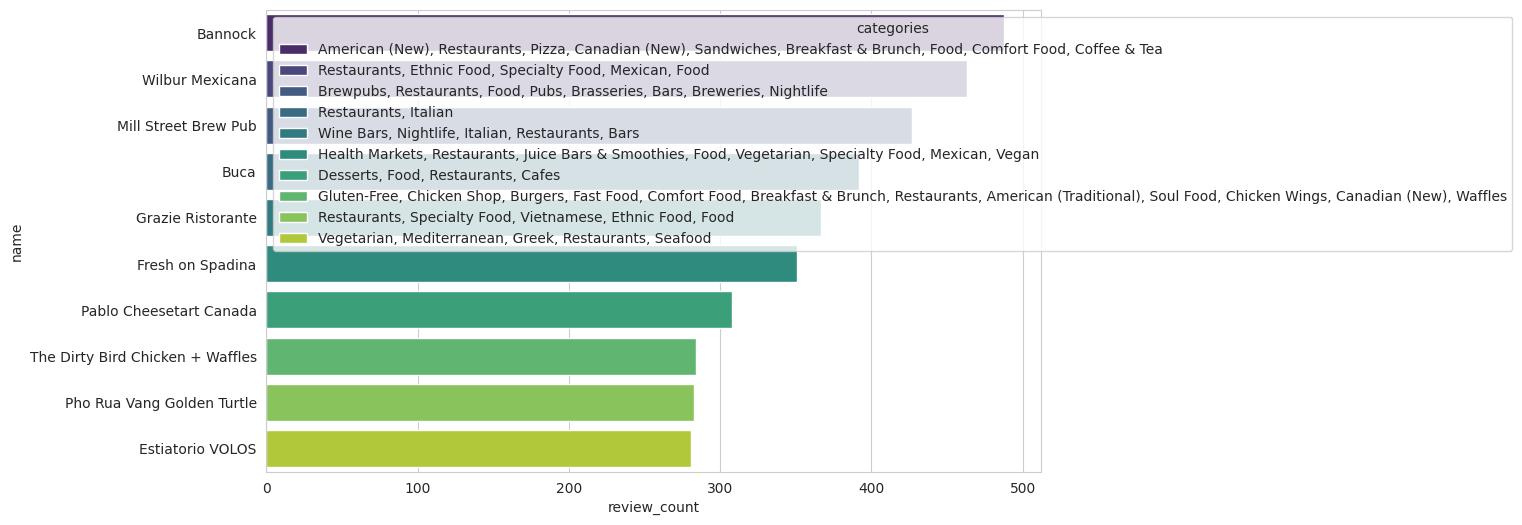

In [6]:
## Quais são os estabelecimentos com maior número de reviews?
df_max_reviews = df[['name','categories','review_count']].sort_values(by='review_count',ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='review_count', y='name', hue='categories', data=df_max_reviews,palette='viridis')

/tmp/ipykernel_11851/811963143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='categories', data=df_categorias,palette='viridis')


<Axes: xlabel='count', ylabel='categories'>

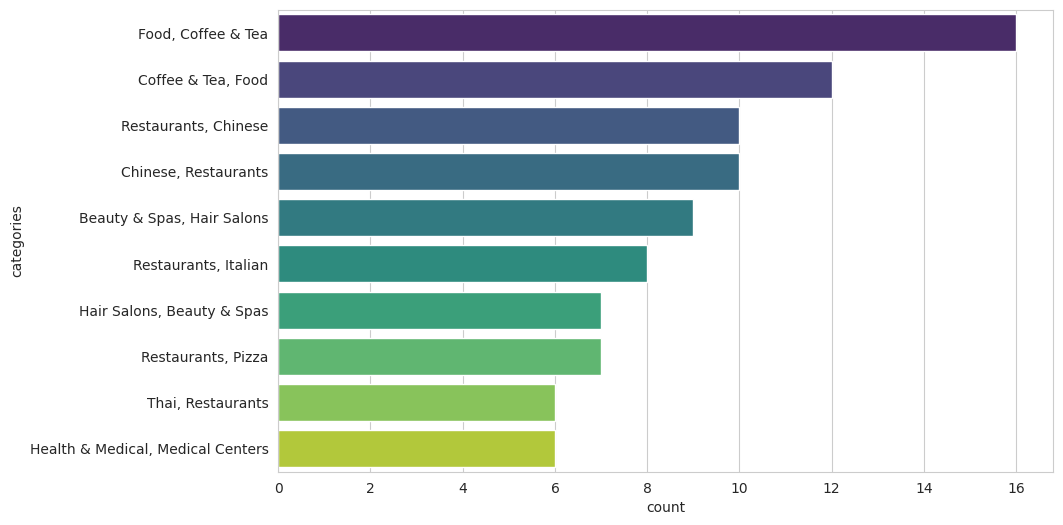

In [7]:
## Quais são as categorias de estabelecimento?
# Algumas categorias estão 
df_categorias = df.groupby('categories').size().sort_values(ascending=False).head(10).reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='categories', data=df_categorias,palette='viridis')

- As coluna categories possuem mais de um tipo de categoria.
- Selecinamos alguns tipos principais de categorias para fazer um agrupamento mais realista.
- Categorias: Restaurants, Coffee & Tea, Nightlife, Arts & Entertainment

In [29]:
df = pd.read_csv('data/X_testToronto.csv')

# Split categories by comma and stack them into new rows
df_expanded = df['categories'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Assign a name to the new column created
df_expanded.name = 'category'

# Create a new DataFrame by joining the expanded categories with the original DataFrame
df_new = df.join(df_expanded)

df_new

,business_id,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours,loc,category
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Restaurants
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Chicken Shop
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Restaurants, Chicken Shop, Fast Food",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Fast Food
1,h6NYKqweTmcBz3z6UeUJ8w,Rosedale Radiology and Ultrasound,600 Sherbourne Street,M4X 1W4,43.671682,-79.376870,6,1,NaN,"Diagnostic Imaging, Diagnostic Services, Docto...",NaN,"{'type': 'Point', 'coordinates': [-79.3768696,...",Diagnostic Imaging
1,h6NYKqweTmcBz3z6UeUJ8w,Rosedale Radiology and Ultrasound,600 Sherbourne Street,M4X 1W4,43.671682,-79.376870,6,1,NaN,"Diagnostic Imaging, Diagnostic Services, Docto...",NaN,"{'type': 'Point', 'coordinates': [-79.3768696,...",Diagnostic Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Restaurants, Cafes, Coffee & Tea, Coffee Roast...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Coffee & Tea
1322,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Restaurants, Cafes, Coffee & Tea, Coffee Roast...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Coffee Roasteries
1322,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Restaurants, Cafes, Coffee & Tea, Coffee Roast...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Food
1323,PBYtC12Vvm5rwTh4zexcVg,Chill Ice House,82 Bathurst Street,M5V 2P3,43.643162,-79.402740,38,1,"{'HasTV': 'True', 'GoodForDancing': 'False', '...","Bars, Nightlife","{'Wednesday': '17:0-23:0', 'Thursday': '17:0-2...","{'type': 'Point', 'coordinates': [-79.40274003...",Bars


In [30]:
# Drop the original 'categories' column
df_final = df_new.drop('categories', axis=1)

# Reset the index
df_final.reset_index(drop=True, inplace=True)

df_final

,business_id,name,address,postal_code,latitude,longitude,review_count,is_open,attributes,hours,loc,category
0,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Restaurants
1,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Chicken Shop
2,0DnQh8SE8BSnvJltGCCiWg,Chick-N-Joy,3-1265 York Mills Road,M3A 1Z3,43.765279,-79.326248,9,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...",NaN,"{'type': 'Point', 'coordinates': [-79.326248, ...",Fast Food
3,h6NYKqweTmcBz3z6UeUJ8w,Rosedale Radiology and Ultrasound,600 Sherbourne Street,M4X 1W4,43.671682,-79.376870,6,1,NaN,NaN,"{'type': 'Point', 'coordinates': [-79.3768696,...",Diagnostic Imaging
4,h6NYKqweTmcBz3z6UeUJ8w,Rosedale Radiology and Ultrasound,600 Sherbourne Street,M4X 1W4,43.671682,-79.376870,6,1,NaN,NaN,"{'type': 'Point', 'coordinates': [-79.3768696,...",Diagnostic Services
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Coffee & Tea
5090,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Coffee Roasteries
5091,Tnb6PrHLSpNqmCiIMsu7cA,Balzac's Coffee,7 Station Street,M5J 1C3,43.644336,-79.383625,9,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","{'Monday': '6:0-20:0', 'Tuesday': '6:0-20:0', ...","{'type': 'Point', 'coordinates': [-79.383625, ...",Food
5092,PBYtC12Vvm5rwTh4zexcVg,Chill Ice House,82 Bathurst Street,M5V 2P3,43.643162,-79.402740,38,1,"{'HasTV': 'True', 'GoodForDancing': 'False', '...","{'Wednesday': '17:0-23:0', 'Thursday': '17:0-2...","{'type': 'Point', 'coordinates': [-79.40274003...",Bars


/tmp/ipykernel_11851/1506646065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='category', data=df_categorias,palette='viridis')


<Axes: xlabel='count', ylabel='category'>

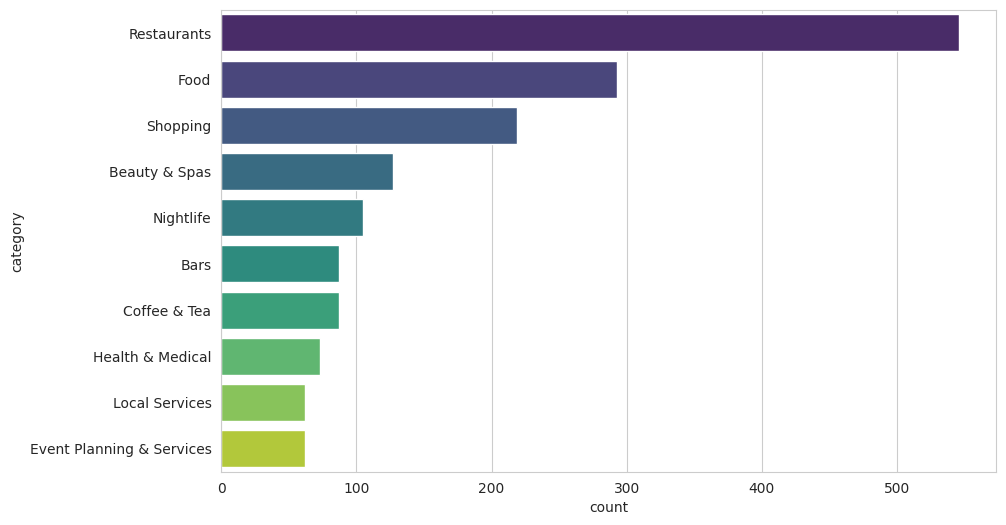

In [32]:
## Quais são as categorias de estabelecimento?
# Algumas categorias estão 
df_categorias = df_final.groupby('category').size().sort_values(ascending=False).head(10).reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='category', data=df_categorias,palette='viridis')

In [33]:
# Display the final DataFrame
df_final_categories = df_final.drop_duplicates(subset='category')['category']

df_final_categories

0                        Restaurants
1                       Chicken Shop
2                          Fast Food
3                 Diagnostic Imaging
4                Diagnostic Services
                    ...             
4903                     Accountants
4913    Television Service Providers
4981             Photo Booth Rentals
5045                  Spiritual Shop
5077                        Piercing
Name: category, Length: 497, dtype: object

In [15]:
df['categories'] = df['categories'].apply(lambda x: str(x).split(','))

In [16]:
df['categories']

0                [Restaurants,  Chicken Shop,  Fast Food]
1       [Diagnostic Imaging,  Diagnostic Services,  Do...
2       [Party & Event Planning,  Hotels & Travel,  Lo...
3          [Caribbean,  Tapas/Small Plates,  Restaurants]
4          [Specialty Food,  Chocolatiers & Shops,  Food]
                              ...                        
1319                  [Beauty & Spas,  Piercing,  Tattoo]
1320                                    [Food,  Bakeries]
1321    [Arts & Entertainment,  Venues & Event Spaces,...
1322    [Restaurants,  Cafes,  Coffee & Tea,  Coffee R...
1323                                   [Bars,  Nightlife]
Name: categories, Length: 1324, dtype: object

In [12]:

## A maior parte dos estabelecimentos são restaurantes?
df['is_restaurant'] = df['categories'].apply(lambda x: 'Restaurants' in x)
df['is_restaurant']

0        True
1       False
2       False
3       False
4       False
        ...  
1319    False
1320    False
1321    False
1322     True
1323    False
Name: is_restaurant, Length: 1324, dtype: bool